In [59]:
# 引入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [61]:
iris_data = pd.read_csv(r'C:\Users\HUANG\Downloads\iris.csv') # 读取数据集
species_turn = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2} # 标签数据化
iris_data['species'] = iris_data['species'].map(species_turn)
X = iris_data.iloc[:, 0 : 4].values
label = iris_data.iloc[:, -1].values

In [63]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

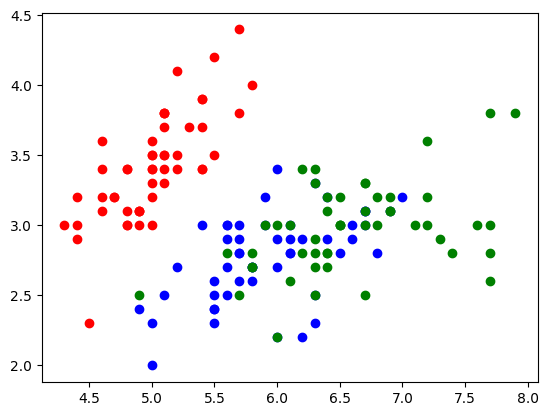

In [65]:
# 以花萼特征观察三类花区别，并实现一定可视化
for i in range(0, 150, 1): 
    if label[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color = 'red') # 红色代表山鸢尾
    if label[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color = 'blue') # 蓝色代表变色鸢尾
    if label[i] == 2:
        plt.scatter(X[i, 0], X[i, 1], color = 'green') # 绿色代表维吉尼亚鸢尾
plt.show()

In [67]:
# 从上图可知， 在花萼特征下山鸢尾与其他两种鸢尾花区分明显， 但在此特征下并不能很好区分变色鸢尾及维吉尼亚鸢尾

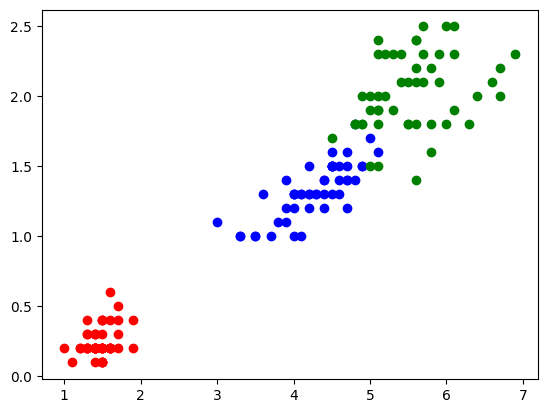

In [69]:
# 以花瓣特征观察三类花区别， 并实现一定可视化
for i in range(0, 150, 1):
    if label[i] == 0:
        plt.scatter(X[i, 2], X[i, 3], color = 'red') #红色代表山鸢尾
    if label[i] == 1:
        plt.scatter(X[i, 2], X[i, 3], color = 'blue') # 蓝色代表变色鸢尾
    if label[i] == 2:
        plt.scatter(X[i, 2], X[i, 3], color = 'green') # 绿色代表维吉尼亚鸢尾
plt.show()

In [71]:
# 从上图可知， 以花瓣特征作为分类标准， 三种鸢尾花都得到较好的区分

In [73]:
# 为了防止后续爆炸，此处设计两个函数试验数据， 此处未划分训练集及测试集， 单纯测试函数性能

In [75]:
# Function()函数， 以花萼特征为判断标准，目的是得出三种分类， 并返回三个簇中心
# X 样本
# label 标签
# T1， T2, T3 分别表示三个簇中心
def Function( X, label, T1, T2, T3):
        num = X.shape[0] # 记录样本数
        sort1 = [] # 记录山鸢尾样本
        sort2 = [] # 记录变色鸢尾样本
        sort3 = [] # 记录维吉尼亚鸢尾样本
        for i in range(0, 1000, 1): # 迭代次数1000
            for j in range(0, num, 1):
                # 计算每个样本到三个中心距离，取最小
                distance_T1 = np.sqrt((X[j, 0] - T1[0]) ** 2 + (X[j, 1] - T1[1]) ** 2)
                distance_T2 = np.sqrt((X[j, 0] - T2[0]) ** 2 + (X[j, 1] - T2[1]) ** 2)
                distance_T3 = np.sqrt((X[j, 0] - T3[0]) ** 2 + (X[j, 1] - T3[1]) ** 2)
                min_distance = min(distance_T1, distance_T2, distance_T3)
                # 加载分类
                if min_distance == distance_T1:
                    sort1.append(X[j, 0 : 2])
                if min_distance == distance_T2:
                    sort2.append(X[j, 0 : 2])
                if min_distance == distance_T3:
                    sort3.append(X[j, 0 : 2])
            sort1_array = np.array(sort1)
            sort2_array = np.array(sort2)
            sort3_array = np.array(sort3)
            # 调整簇中心
            if sort1_array.size > 0:
                T1[0] = np.mean(sort1_array[:, 0])
                T1[1] = np.mean(sort1_array[:, 1])
            if sort2_array.size > 0:
                T2[0] = np.mean(sort2_array[:, 0])
                T2[1] = np.mean(sort2_array[:, 1])
            if sort3_array.size > 0:
                T3[0] = np.mean(sort3_array[:, 0])
                T3[1] = np.mean(sort3_array[:, 1])
            if i != 999: # 保留最后一组分类（实际上没什么用，我只是要画个图看看）
                sort1.clear()
                sort2.clear()
                sort3.clear()
        return sort1_array, sort2_array, sort3_array, T1, T2, T3

In [83]:
# 初始化T1， T2, T3
T1 = [5.1,3.5]
T2 = [5.5,2.3]
T3 = [7.1,3.0]

In [95]:
final_sort1, final_sort2, final_sort3, final_T1, final_T2, final_T3 = Function(X, label, T1, T2, T3)

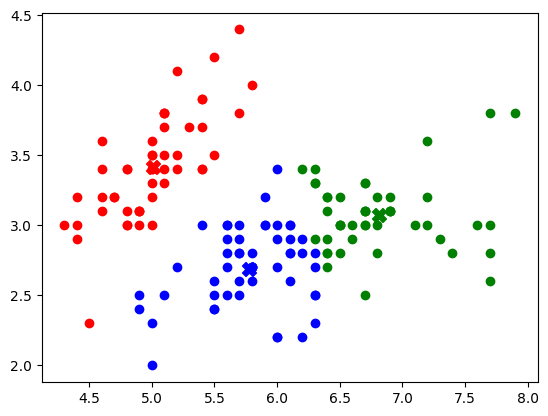

In [86]:
for i in range (len(final_sort1)):
    if i == 0:
        continue
    else:
        plt.scatter(final_sort1[i, 0], final_sort1[i, 1], color = 'red')
plt.scatter(final_T1[0], final_T1[1], color = 'red', marker = 'X', s =  100) # 特殊显示山鸢尾簇中心
for i in range (len(final_sort2)):
    if i == 0:
        continue
    else:
        plt.scatter(final_sort2[i, 0], final_sort2[i, 1], color = 'blue')
plt.scatter(final_T2[0], final_T2[1], color = 'blue', marker = 'X', s = 100) # 特殊显示变色鸢尾簇中心
for i in range (len(final_sort3)):
    if i == 0:
        continue
    else:
        plt.scatter(final_sort3[i, 0], final_sort3[i, 1], color = 'green')
plt.scatter(final_T3[0], final_T3[1], color = 'green', marker = 'X', s = 100) # 特殊显示维吉尼亚鸢尾簇中心
plt.show()
# 和图一有点区别，大致相似， 可以接受

In [89]:
# 编写预测函数
def predict(X, label, T1, T2, T3):
    a, b, c, t1, t2, t3 = Function(X, label, T1, T2, T3) # 调用分类函数
    label_pred = []
    for i in range (len(X)):
        distance_t1 = np.sqrt((X[i, 0] - t1[0]) ** 2 + (X[i, 1] - t1[1]) ** 2)
        distance_t2 = np.sqrt((X[i, 0] - t2[0]) ** 2 + (X[i, 1] - t2[1]) ** 2)
        distance_t3 = np.sqrt((X[i, 0] - t3[0]) ** 2 + (X[i, 1] - t3[1]) ** 2)
        min_distance = min(distance_t1, distance_t2, distance_t3)
        # 判断距离
        if min_distance == distance_t1:
            label_pred.append(0)
        if min_distance == distance_t2:
            label_pred.append(1)
        if min_distance == distance_t3:
            label_pred.append(2)
    accuracy = accuracy_score(label, label_pred) # 计算准确率
    return accuracy
    

In [91]:
ans = predict(X, label, T1, T2, T3)

In [92]:
ans
# 得出来82%的准确率，符合预计，花萼的拟合效果并

0.82

In [115]:
# 测试部分结束， 开始实现类封装

In [103]:
# 定义类
class Kmeans:
    # X 样本
    # label 标签
    # T1， T2, T3 分别表示三个簇中心
    # num_iter 迭代次数
    def __init__(self, T1, T2, T3, X, label, num_iter):
        self.T1 = T1
        self.T2 = T2
        self.T3 = T3
        self.X = X
        self.label = label
        self.num_iter = num_iter

    def Function(self):
        num = self.X.shape[0] # 记录样本数
        sort1 = [] # 记录山鸢尾样本
        sort2 = [] # 记录变色鸢尾样本
        sort3 = [] # 记录维吉尼亚鸢尾样本
        for i in range(0, self.num_iter, 1):
            for j in range(0, num, 1):
                # 计算每个样本到三个中心距离，取最小
                distance_T1 = np.sqrt((self.X[j, 0] - self.T1[0]) ** 2 + (self.X[j, 1] - self.T1[1]) ** 2)
                distance_T2 = np.sqrt((self.X[j, 0] - self.T2[0]) ** 2 + (self.X[j, 1] - self.T2[1]) ** 2)
                distance_T3 = np.sqrt((self.X[j, 0] - self.T3[0]) ** 2 + (self.X[j, 1] - self.T3[1]) ** 2)
                min_distance = min(distance_T1, distance_T2, distance_T3)
                # 加载分类
                if min_distance == distance_T1:
                    sort1.append(self.X[j, 0 : 2])
                if min_distance == distance_T2:
                    sort2.append(self.X[j, 0 : 2])
                if min_distance == distance_T3:
                    sort3.append(self.X[j, 0 : 2])
            sort1_array = np.array(sort1)
            sort2_array = np.array(sort2)
            sort3_array = np.array(sort3)
            # 调整簇中心
            if sort1_array.size > 0:
                self.T1[0] = np.mean(sort1_array[:, 0])
                self.T1[1] = np.mean(sort1_array[:, 1])
            if sort2_array.size > 0:
                self.T2[0] = np.mean(sort2_array[:, 0])
                self.T2[1] = np.mean(sort2_array[:, 1])
            if sort3_array.size > 0:
                self.T3[0] = np.mean(sort3_array[:, 0])
                self.T3[1] = np.mean(sort3_array[:, 1])
            if i != 999:
                sort1.clear()
                sort2.clear()
                sort3.clear()
        return sort1_array, sort2_array, sort3_array, self.T1, self.T2, self.T3

    def predict(self, X, label):
        a, b, c, t1, t2, t3 = Function(self.X, self.label, self.T1, self.T2, self.T3)
        label_pred = []
        for i in range (len(X)):
            distance_t1 = np.sqrt((X[i, 0] - t1[0]) ** 2 + (X[i, 1] - t1[1]) ** 2)
            distance_t2 = np.sqrt((X[i, 0] - t2[0]) ** 2 + (X[i, 1] - t2[1]) ** 2)
            distance_t3 = np.sqrt((X[i, 0] - t3[0]) ** 2 + (X[i, 1] - t3[1]) ** 2)
            min_distance = min(distance_t1, distance_t2, distance_t3)
            if min_distance == distance_t1:
                label_pred.append(0)
            if min_distance == distance_t2:
                label_pred.append(1)
            if min_distance == distance_t3:
                label_pred.append(2)
        accuracy = accuracy_score(label, label_pred) # 计算准确率
        return accuracy
        
        
            
        

In [105]:
T1 = [5.1,3.5]
T2 = [5.5,2.3]
T3 = [7.1,3.0]

In [107]:
X_train, X_test, label_train, label_test = train_test_split(X, label, test_size = 0.2, random_state = 24) # 划分训练集，测试集

In [109]:
Kmeans_model = Kmeans(T1, T2, T3, X_train, label_train,  1000) # 训练模型

In [111]:
accuracy = Kmeans_model.predict(X_test, label_test) # 用测试集测试准确率

In [112]:
accuracy
# 显示0.9，略高于前面0.82， 属于合理范畴

0.9